- file path: ~/KUBIG/KUBIG_2019_Summer/Python/data/ratings.csv

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



- housing.csv를 pandas dataframe의 형태로 data라는 변수에 저장하시오.

In [38]:
data=pd.read_csv("~/KUBIG/KUBIG_2019_Summer/Python/data/housing.csv")

- data의 head를 출력하시오.

In [39]:
print(data.head())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


- data의 MEDV 열의 1st quantile, median, 3rd quantile을 출력하시오.

In [40]:
print(np.percentile(data.MEDV,[25,50,75]))

[350700. 438900. 518700.]


- data의 MEDV열의 interquantile range를 구해서 IQR이라는 변수에 저장하고 출력하시오.

In [41]:
IQR=np.percentile(data.MEDV,[25,50,75])[2]-np.percentile(data.MEDV,[25,50,75])[0]
print(IQR)

168000.0


- MEDV열에 들어있는 값들로 box plot을 그리시오.
- x축의 이름은 'Median value of owner-occupied homes in $1000's'로 하시오.

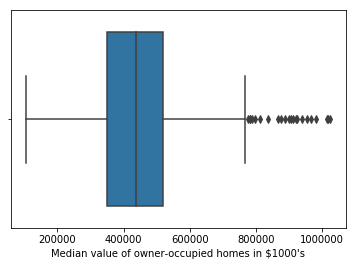

In [42]:
_=sns.boxplot(data.MEDV)
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.show()

- MEDV열의 값들의 분산을 구하시오.

In [43]:
differences=data.MEDV-np.mean(data.MEDV)
diff_sq=differences**2
variance_explicit=np.mean(diff_sq)

In [44]:
variance_np=np.var(data.MEDV)

In [45]:
print(variance_explicit==variance_np)

True


- MEDV열의 표준편차를 구하시오.

In [46]:
print(np.std(data.MEDV))
print(np.sqrt(variance_np)==np.std(data.MEDV))

165171.13154429474
True


- x축 변수를 data의 LSTAT열의 성분으로 하고 y축 변수를 data의 MEDV열의 성분으로 해서 산점도를 그리시오.
- x축의 이름은 "% lower status of the population"로 하고 y축의 이름은 "Median value of owner-occupied homes in $1000's"로 하시오.

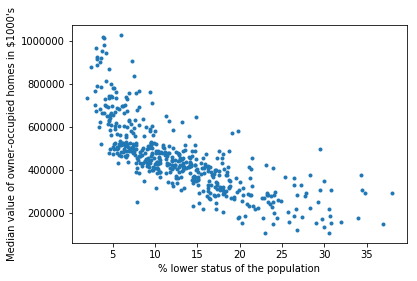

In [47]:
_=plt.plot(data.LSTAT,data.MEDV,marker=".",linestyle='none')
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

- sklearn의 LinearRegression 함수를 이용해서 모델을 적합하시오.
- 설명변수는 data의 RM열이고 반응변수는 data의 MEDV열입니다.

In [48]:
MEDV=data.MEDV
MEDV=np.array(MEDV)
MEDV=MEDV.reshape(len(MEDV),1)

In [49]:
RM=data.RM
RM=np.array(RM)
RM=RM.reshape(len(RM),1)

In [50]:
model=LinearRegression(fit_intercept=True)
model.fit(RM,MEDV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- 적합한 모델의 회귀계수추정량과 절편을 출력하시오.

In [51]:
print(model.coef_)
print(model.intercept_)

[[179098.59189784]]
[-663283.91058252]


- RM의 표본평균을 설명변수의 값으로 해서 반응변수를 예측하시오.
- 우선, RM의 표본평균을 srm이라는 변수에 저장하시오.

In [52]:
srm=np.mean(RM)
srm=srm.reshape(-1,1)

- RM의 표본평균을 설명변수의 값으로 할 때의 예측값을 smedv라는 변수에 저장하고 출력하시오.

In [53]:
smedv=model.predict(srm)
print("predicted value = ${:0.3f} ".format(smedv[0,0]))

predicted value = $454342.945 


- 이번에는 설명변수를 data의 LSTAT열로 하고 반응변수를 data의 MEDV열로 해서 모델을 적합하시오.

In [54]:
LSTAT=np.array(data.LSTAT).reshape(-1,1)
model.fit(LSTAT,MEDV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- 적합한 모델의 회귀계수추정량과 절편을 출력하시오.

In [55]:
print(model.coef_)
print(model.intercept_)

[[-17759.04832737]]
[684138.49306845]


- 설명변수를 LSTAT, 반응변수를 MEDV로 할 때, RSS, RMSE와 R-squared를 구하시오.

In [56]:
residuals=model.predict(LSTAT)-MEDV
RSS=np.sum((residuals**2))
print(RSS)

5621499266518.002


In [57]:
MSE1=RSS/len(residuals)
RMSE1=np.sqrt(MSE1)

print(MSE1)
print(RMSE1)

11495908520.486712
107218.97462896533


In [58]:
MSE2=mean_squared_error(MEDV,model.predict(LSTAT))
print(MSE2)
print(MSE1==MSE2)

11495908520.486712
True


In [59]:
var_residuals=np.sum(np.square(residuals))
var_deviations=np.sum(np.square(MEDV-np.mean(MEDV)))
r_squared1=1-(var_residuals/var_deviations)
print(r_squared1)

0.5786189401388357


In [60]:
r_squared2=r2_score(MEDV,model.predict(LSTAT))
print(r_squared2)
print(r_squared1==r_squared2)

0.5786189401388357
True
